0.95
1095.8429611


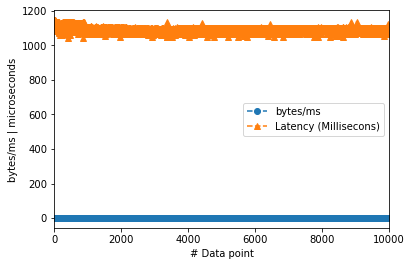

In [11]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1510670606_full_vector_encoder_1_0_8_134217728')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])
latency = [lat/(1000) for lat in latency]
throughput = [th/(1000) for th in throughput] 
print(throughput[0])

avg_latency = 0.0
for val in latency:
    avg_latency = avg_latency + val
    
avg_latency = avg_latency / len(latency)
print avg_latency

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/ms', 'Latency (Millisecons)'])
plt.ylabel('bytes/ms | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_64_16.eps')
plt.show()

2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


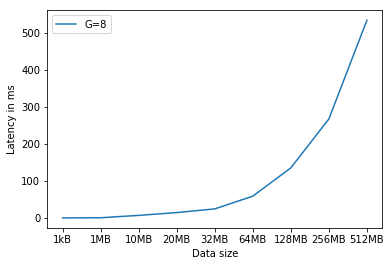

In [4]:
## Generation Size: 8 
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=8', 'G=8(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_8.eps')
plt.show()


2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


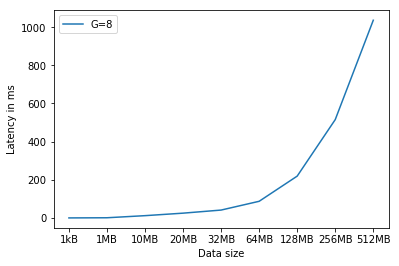

In [6]:
## Generation Size: 16
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=16', 'G=16(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_16.eps')
plt.show()




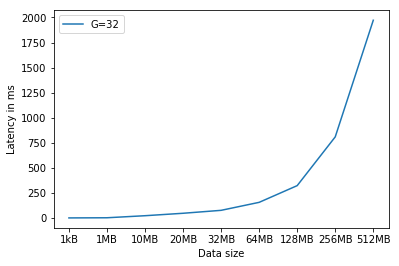

In [8]:
## Generation Size: 32 
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)
plt.plot(data_size, latency)
plt.legend(['G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_32.eps')
plt.show()


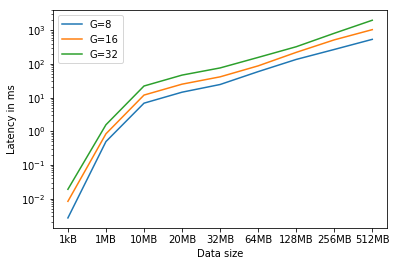

In [9]:
## Generation Size: 8,16,32 
## Full Vector - latency comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def read_gen_eight():
    one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
    one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
    ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
    twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
    thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
    one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
    ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
    twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
    thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
    sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(eight_data_size, my_xticks)
plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_comparison.eps')
plt.show()

/Users/larsnielsen/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


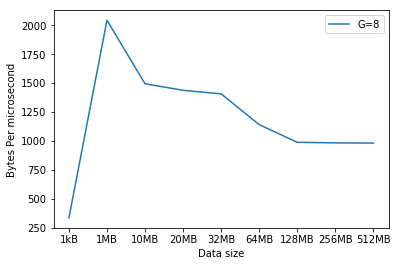

In [1]:
## Generation Size: 8 
## Full Vector - throughput 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    return np.average(latency)
    
one_kb = 'results/1510751197_full_vector_encoder_1_0_8_128'
one_mb = 'results/1510751438_full_vector_encoder_1_0_8_131072'
ten_mb = 'results/1510752389_full_vector_encoder_1_0_8_1310720'
twenty_mb = 'results/1510822030_full_vector_encoder_1_0_8_2621440'
thirdy_two_mb = 'results/1510824925_full_vector_encoder_1_0_8_4194304'
sixty_four_mb = 'results/1510836357_full_vector_encoder_1_0_8_8388608'
one_hundre_and_twenty_eight_mb = 'results/1510847597_full_vector_encoder_1_0_8_16777216'
two_hundre_and_fifty_six_mb = 'results/1510927849_full_vector_encoder_1_0_8_33554432'
five_hundre_and_twelve_mb = 'results/1510972685_full_vector_encoder_1_0_8_67108864'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)
plt.plot(data_size, latency)
plt.legend(['G=8'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_through_put_gen_8.eps')
plt.show()

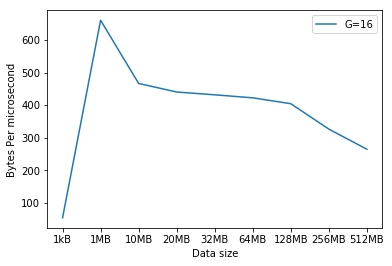

In [17]:
## Generation Size: 16 
## Full Vector - throughput 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    return np.average(latency)
    
    five_hundre_and_twelve_mb = 'results/1511427894_full_vector_encoder_1_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/1511454980_full_vector_encoder_1_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/1511470001_full_vector_encoder_1_0_16_8388608'
    sixty_four_mb = 'results/1511479334_full_vector_encoder_1_0_16_4194304'
    thirdy_two_mb = 'results/1511516065_full_vector_encoder_1_0_16_2097152'
    twenty_mb = 'results/1511524913_full_vector_encoder_1_0_16_1310720'
    ten_mb = 'results/1511529363_full_vector_encoder_1_0_16_655360'
    one_mb = 'results/1511534339_full_vector_encoder_1_0_16_65536'
    one_kb = 'results/1511534688_full_vector_encoder_1_0_16_64'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)
plt.plot(data_size, latency)
plt.legend(['G=16'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_through_put_gen_16.eps')
plt.show()

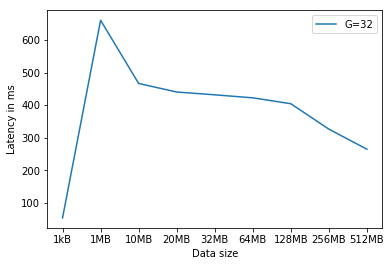

In [26]:
## Generation Size: 32 
## Full Vector - throughput 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    return np.average(latency)
    
one_kb = 'results/1511252697_full_vector_encoder_1_0_32_32'
one_mb = 'results/1511252611_full_vector_encoder_1_0_32_32768'
ten_mb = 'results/1511252293_full_vector_encoder_1_0_32_327680'
twenty_mb = 'results/1511221602_full_vector_encoder_1_0_32_655360'
thirdy_two_mb = 'results/1511217072_full_vector_encoder_1_0_32_1048576'
sixty_four_mb = 'results/1511210497_full_vector_encoder_1_0_32_2097152'
one_hundre_and_twenty_eight_mb = 'results/1511201901_full_vector_encoder_1_0_32_4194304'
two_hundre_and_fifty_six_mb = 'results/1511187820_full_vector_encoder_1_0_32_8388608'
five_hundre_and_twelve_mb = 'results/1511156569_full_vector_encoder_1_0_32_16777216'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)
plt.plot(data_size, latency)
plt.legend(['G=32'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_through_gen_32.eps')
plt.show()


336.3206
2043.096
1494.6857
1437.9984
1407.4016
1142.202
989.0439
984.4317
982.3868
126.422
1217.3281
858.5034
821.6987
800.3391
749.1728
603.6961
507.4595
506.3925
54.3936
660.137
466.4345
440.2093
431.6178
422.3622
404.3491
326.4833
264.8809


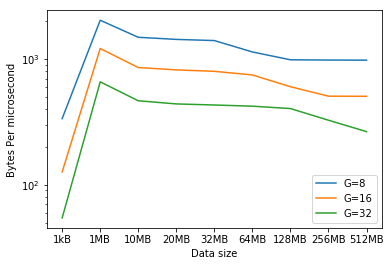

In [21]:
## Generation Size: 8,16,32 
## Full Vector - throughput comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    print(np.average(latency))
    return np.average(latency)

def read_gen_eight():
    one_kb = 'results/1510751197_full_vector_encoder_1_0_8_128'
    one_mb = 'results/1510751438_full_vector_encoder_1_0_8_131072'
    ten_mb = 'results/1510752389_full_vector_encoder_1_0_8_1310720'
    twenty_mb = 'results/1510822030_full_vector_encoder_1_0_8_2621440'
    thirdy_two_mb = 'results/1510824925_full_vector_encoder_1_0_8_4194304'
    sixty_four_mb = 'results/1510836357_full_vector_encoder_1_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/1510847597_full_vector_encoder_1_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/1510927849_full_vector_encoder_1_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/1510972685_full_vector_encoder_1_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/1511427894_full_vector_encoder_1_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/1511454980_full_vector_encoder_1_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/1511470001_full_vector_encoder_1_0_16_8388608'
    sixty_four_mb = 'results/1511479334_full_vector_encoder_1_0_16_4194304'
    thirdy_two_mb = 'results/1511516065_full_vector_encoder_1_0_16_2097152'
    twenty_mb = 'results/1511524913_full_vector_encoder_1_0_16_1310720'
    ten_mb = 'results/1511529363_full_vector_encoder_1_0_16_655360'
    one_mb = 'results/1511534339_full_vector_encoder_1_0_16_65536'
    one_kb = 'results/1511534688_full_vector_encoder_1_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    one_kb = 'results/1511252697_full_vector_encoder_1_0_32_32'
    one_mb = 'results/1511252611_full_vector_encoder_1_0_32_32768'
    ten_mb = 'results/1511252293_full_vector_encoder_1_0_32_327680'
    twenty_mb = 'results/1511221602_full_vector_encoder_1_0_32_655360'
    thirdy_two_mb = 'results/1511217072_full_vector_encoder_1_0_32_1048576'
    sixty_four_mb = 'results/1511210497_full_vector_encoder_1_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/1511201901_full_vector_encoder_1_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/1511187820_full_vector_encoder_1_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/1511156569_full_vector_encoder_1_0_32_16777216'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(eight_data_size, my_xticks)
plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_throughput_gen_comparison.eps')
plt.show()

2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


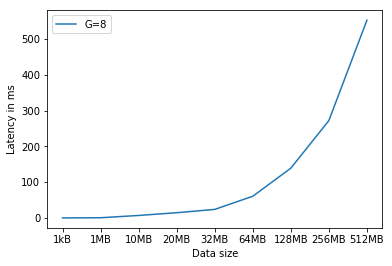

In [24]:
## Generation Size: 8 
## On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)


five_hundre_and_twelve_mb = 'results/thousand/1511552719_on_the_fly_encoder_1_0_8_67108864'
two_hundre_and_fifty_six_mb = 'results/thousand/1511555855_on_the_fly_encoder_1_0_8_33554432'
one_hundre_and_twenty_eight_mb = 'results/thousand/1511559074_on_the_fly_encoder_1_0_8_16777216'
sixty_four_mb = 'results/thousand/1511561934_on_the_fly_encoder_1_0_8_8388608'
thirdy_two_mb = 'results/thousand/1511566200_on_the_fly_encoder_1_0_8_4194304'
twenty_mb = 'results/thousand/1511566483_on_the_fly_encoder_1_0_8_2621440'
ten_mb = 'results/thousand/1511567149_on_the_fly_encoder_1_0_8_1310720'
one_mb = 'results/thousand/1511567259_on_the_fly_encoder_1_0_8_131072'
one_kb = 'results/thousand/1511567551_on_the_fly_encoder_1_0_8_128'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=8', 'G=8(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_8.eps')
plt.show()

